Spalte Preis: Rechtsschieflage aufgrund vieler Ausreißer


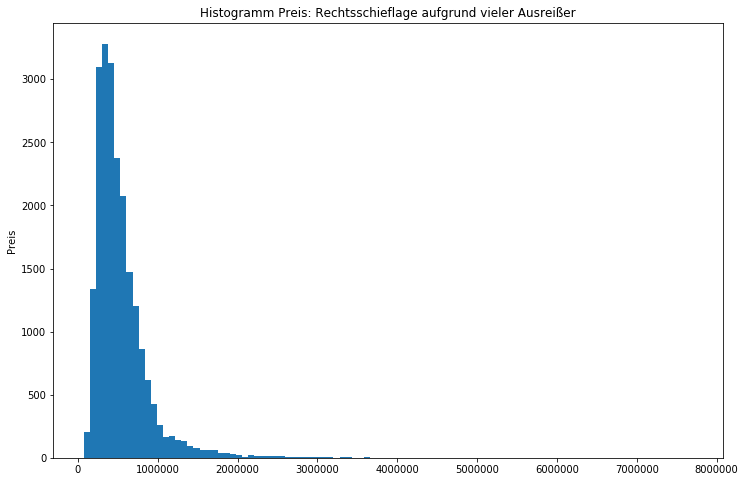

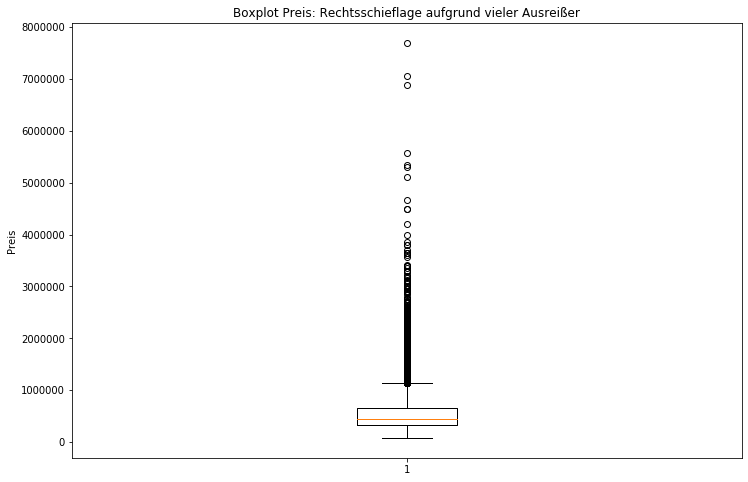

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


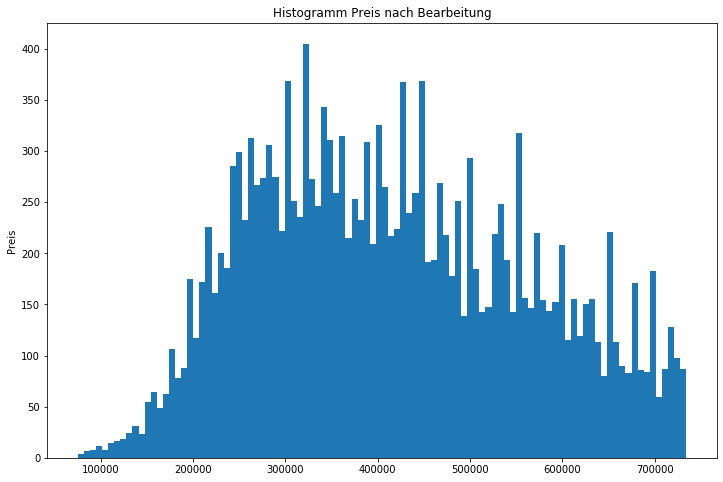

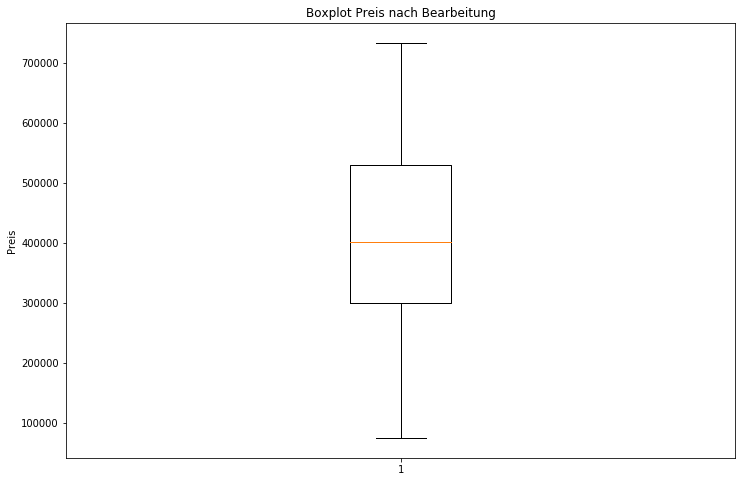

In [2]:
#Importing the required libraries

from tkinter import *
from tkinter import filedialog
import tkinter.font as font
from tkinter import messagebox
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.font_manager import FontProperties



#Initialize main window
root = Tk()
    
#title "spaly"
root.title('spaly')
root.geometry("1080x750")
#Icon
root.iconbitmap('spaly_logo.ico')



#define the function to open a csv-file
#added try and except block in case, that no file is uploaded
def open():
    global filename
    global data_df
    global upload_message
    filename = filedialog.askopenfilename(initialdir="C:/", title="Öffne CSV-Datei", filetype=[("CSV", "*.csv")])
    try:
        data_df=pd.read_csv(filename)
    except FileNotFoundError:
        return
    message.grid_forget()
    frame_csv.grid_forget()
    upload_message = Label(root, font=8, text="Upload erfolgreich!")
    imported = True
    upload_message.grid(row=0, column=0, padx=40, pady=20)
    button_openfile.grid_forget()
    button_eda.grid(row=1, column=0)
    button_weiter.grid(row=0, column=1, padx=10, pady=40, ipadx=10, ipady=10)

# define the function for the Exploratory Data Analysis and show it in the window
# the histogram and boxplot for the price column will be printed solely
def eda():
    global eda_dtypes_label
    global eda_shape_label
    global eda_head_label
    upload_message.grid_forget()
    eda_dtypes_msg = f"Datentyp der Spalten:\n {data_df.dtypes}"
    eda_shape_msg = f"Form der Daten:\n {data_df.shape}"
    eda_head_msg = f"Erste Zeilen:\n {data_df.head()}"
    eda_count_msg = f"Anzahl an Daten:\n {data_df.count()}"
    eda_dtypes_label = Label(root, text=eda_dtypes_msg)
    eda_dtypes_label.grid(row=2, column=1)
    eda_shape_label = Label(root, text=eda_shape_msg)
    eda_shape_label.grid(row=3, column=1)
    eda_head_label = Label(root, text=eda_head_msg)
    eda_head_label.grid(row=2, column=0)
    print('Spalte Preis: Rechtsschieflage aufgrund vieler Ausreißer')
    plt.figure(figsize=(12, 8))
    plt.hist(data_df.price, bins=100)
    plt.title('Histogramm Preis: Rechtsschieflage aufgrund vieler Ausreißer')
    plt.ylabel('Preis')
    plt.show()
    plt.close('all')
    plt.figure(figsize=(12, 8))
    plt.boxplot(data_df.price)
    plt.title('Boxplot Preis: Rechtsschieflage aufgrund vieler Ausreißer')
    plt.ylabel('Preis')
    plt.show()
    plt.close('all')
    button_dropcol.grid(row=1, column=1, pady=10, padx=10)
    
# define the function to cut 5% of the price data, because of too many outliers and thus, right skewed data
# outliers that are more than 2 times the standard deviation away from the median will be cut
def just_95(x):
    if (x < (-2 * data_df['price'].std())) or (x > (2 * data_df['price'].std())):
        return np.nan
    else:
        return x

# define the function to drop unnecessary columns
# added try and except to elude an error incase the columns don't exist
def drop_col():
    eda_dtypes_label.grid_forget()
    eda_shape_label.grid_forget()
    eda_head_label.grid_forget()
    try:
        data_df.drop(['id', 'date', 'waterfront', 'zipcode', 'lat', 'long', 'yr_renovated'], axis=1, inplace=True)
    except:
        KeyError
    print(data_df.columns)

    
    #drop 5% of price column
    data_df['price'] = data_df['price'].apply(just_95)
    data_df['price'].isna().sum()
    data_df.dropna(inplace=True)
    plt.figure(figsize=(12, 8))
    plt.hist(data_df.price, bins=100)
    plt.title('Histogramm Preis nach Bearbeitung')
    plt.ylabel('Preis')
    plt.show()
    plt.close('all')
    plt.figure(figsize=(12, 8))
    plt.boxplot(data_df.price)
    plt.title('Boxplot Preis nach Bearbeitung')
    plt.ylabel('Preis')
    plt.show()
    plt.close('all') 

    
# define the function weiter for the button
def weiter():
    global choice_radio
    global button_submit_depvar
    global button_list
    global frame_radio
    button_dropcol.grid_forget()
    choice_radio = StringVar()
    choice_radio.set(data_df.columns[0])
    index = 2
    index_col = 0
    button_list = []
    frame_radio = Frame(root, relief=SUNKEN, bg='#dddddd')
    frame_radio.grid(row=1, pady=10, padx=10)
    # iterate through the columns to insert every column in the radio button-list for confirming the dependent variable
    for col in data_df.columns:
        button = Radiobutton(frame_radio, font=4, bg='#dddddd', text=col, variable=choice_radio, value=col)
        button.grid(row=index, column=index_col, padx=8)
        if index == 10:
            index = 2
            index_col +=1
        index += 1
        button_list.append(button)
    button_weiter.grid_forget()
    button_eda.grid_forget()
    dep_label.grid(row=0, column=0, pady=5, padx=8)
    button_submit_depvar = Button(root, font=4, text="Bestätige abhängige Variable!", command=lambda: split_variables(choice_radio.get()), fg="#FFFFFF", bg="#8BD933", bd=5)
    button_submit_depvar.grid(row=1, column=index_col+1, padx= 5,pady=35, ipadx=6, ipady=6)

#define the function to split the data columns into dependent and independent variables
def split_variables(dependent):
    global mlr_button
    global x
    global y
    x = data_df.drop([dependent], axis=1).values
    y = data_df[dependent].values
    for but in button_list:
        but.grid_forget()
    button_submit_depvar.grid_forget()
    dep_label.grid_forget()
    frame_radio.grid_forget()
    button_weiter.grid_forget()
    mlr_button = Button(root, font=8, text="Multiple lineare Regression", command=show_mlr, fg="#FFFFFF", bg="#8BD933", bd=5)
    mlr_button.grid(row=0, column=0, pady=20, padx=20)

    
#define the function to show the Multiple Linear Regression section
def show_mlr():
    global predict_test_button
    global x_train
    global x_test
    global y_train
    global y_test
    global ml
    global y_pred
    global show_msg_split
    global predict_test_label
    global y_pred_label
    global evaluate_header_label
    global evaluate_label
    global scatter_button
    mlr_button["state"] = DISABLED
    # split the data into train and test sets
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
    show_msg_split = Label(root, text="Trainings- und Testdaten erfolgreich geteilt.")
    show_msg_split.grid(row=2, column=0, columnspan=2, pady=10)
    # fit the training set into the Multiple Linear Regression algorithm
    ml = LinearRegression()
    ml.fit(x_train,y_train)
    # test the model on the test set
    y_pred = ml.predict(x_test)
    predict_test_label = Label(root, text="Vorhersage des Test Sets: ")
    predict_test_label.grid(row=4, column=0, columnspan=2, pady=10)
    y_pred_label = Label(root, text=y_pred)
    y_pred_label.grid(row=4, pady=10)
    evaluate_header_label = Label(root, text="Evaluation des Modells: \n 1 = Bester Score \n 0 = sagt immer dasselbe voraus, egal welcher Input \n Kann auch negativ sein")
    evaluate_header_label.grid(row=6, pady=10)
    # show the r2 score of the model
    evaluate_score = r2_score(y_test,y_pred)
    evaluate_label = Label(root, text=evaluate_score)
    evaluate_label.grid(row=7)
    scatter_button = Button(root, font=7, text="Erstelle Scatter Plot", command=scatter_plot, fg="#FFFFFF", bg="#8BD933", bd=5)
    scatter_button.grid(row=8, pady=10)
        


#define the function to show the scatter plot that plots the predictions versus the actual results
def scatter_plot():
    global scatter1
    global weiter2_button
    global pred_y_df_label
    scatter_button.grid_forget()
    show_msg_split.grid_forget()
    predict_test_label.grid_forget()
    y_pred_label.grid_forget()
    evaluate_header_label.grid_forget()
    evaluate_label.grid_forget()
    scatter_button.grid_forget()
    y_diff = y_test-y_pred
    figure1 = plt.Figure(figsize=(15,10), dpi=50)
    ax1 = figure1.add_subplot(1,2,1)
    ax1.scatter(y_test, y_pred)
    ax2 = figure1.add_subplot(1,2,2)
    ax2.hist(y_diff)
    # show the figures in a different window
    scatter_window = Toplevel()
    scatter_window.iconbitmap('spaly_logo.ico')
    scatter1 = FigureCanvasTkAgg(figure1, scatter_window)
    scatter1.get_tk_widget().grid(row=1, pady=10)
    ax1.set_xlabel('Ist-Wert',fontsize=15, fontweight='bold')
    ax1.set_ylabel('Vorhergesagter Wert',fontsize=15, fontweight='bold')
    ax1.set_title('Ist vs. Vorhergesagt',fontsize=15, fontweight='bold')
    ax2.set_xlabel('Differenz Ist vs. Vorhergesagt',fontsize=15, fontweight='bold')
    ax2.set_ylabel('Häufigkeit',fontsize=15, fontweight='bold')
    ax2.set_title('Histogramm der Differenz - Normalverteilung',fontsize=15, fontweight='bold')
    pred_y_df = pd.DataFrame({'Ist-Wert':y_test, 'Vorhergesagter Wert':y_pred, 'Unterschied':y_test-y_pred})
    pred_y_df_label = Label(root, text=pred_y_df)
    pred_y_df_label.grid(row=1, pady=10)
    weiter2_button = Button(root, font=9, text="Weiter", command=weiter2, fg="#FFFFFF", bg="#8BD933", bd=5)
    weiter2_button.grid(row=0, column=3, pady=10)
    
    
#define the function weiter2 for the same button
def weiter2():
    global pred_entry
    # added try and except in case the figures window was already closed
    try:
        scatter1.get_tk_widget().grid_forget()
    except:
        pass
    weiter2_button.grid_forget()
    pred_y_df_label.grid_forget()
    pred_entry_label = Label(root, font=7, text="Werte für Vorhersage eingeben")
    pred_entry_label.grid(row=3, column=0, pady=20, padx=20, ipadx=20, ipady=20)
    pred_entry = Entry(root)
    pred_entry.grid(row=4, column=0, pady=10)
    pred_button = Button(root, font=9, text="Vorhersage", command=predict, fg="#FFFFFF", bg="#8BD933", bd=5)
    pred_button.grid(row=4,column=2, pady=10, padx=5)    


    
#define function predict
def predict():
    try:
        pred = ml.predict(eval(pred_entry.get()))
        #create result label
        description_res_label = Label(root, text="Preis laut Vorhersage:")
        description_res_label.grid(row=6, pady=10)
        pred_result_label = Label(root, text=pred)
        pred_result_label.grid(row=7, pady=10)
    except:
        pass
    
    

### BUTTONS

#open file button
button_openfile = Button(root, text="Öffne CSV",font=7, command=open, fg="#FFFFFF", bg="#8BD933", bd=5)

#EDA Button
button_eda = Button(root, text="Exploratory Data Analysis", font=7, command=eda,  fg="#FFFFFF", bg="#8BD933", bd=5)

#Drop columns button
button_dropcol = Button(root, text="Überflüssige Spalten entfernen und Preisspalte einschränken", font=7, command=drop_col,  fg="#FFFFFF", bg="#8BD933", bd=5)

#Weiter button
button_weiter = Button(root, text="Weiter",font=7, command=weiter, fg="#FFFFFF", bg="#8BD933", bd=5)



###FRAMES

#Frame für message CSV aufbereiten erstellen
frame_csv = Frame(root, bg='#dddddd')


###LABELS

#Label dependent variable
dep_label = Label(root, font=7, text="Abhängige variable")

#Label nur relevante Spalten Information
message = Label(frame_csv, bg='#dddddd', relief=GROOVE, text="Bitte CSV-Datei so aufbereiten, dass nur relevante Spalten in der Datei sind.\n Eine Spalte kennzeichnet die abhängige Variable und die anderen sind unabhängige Variablen. \n Zusätzlich sollen im Excel nur Zahlenwerte verwendet werden, keine Strings (ausgenommen der Spaltennamen).")    


    
###POSITIONING

#Labels
#csv message Label
message.grid(row=0, column=0, columnspan=3, pady=20, padx=15)


#Buttons
#button open file
button_openfile.grid(row=2, column=0, pady=90, padx=230, ipadx=10, ipady=10)

#Frame
#csv message frame
frame_csv.grid(row=0, column=0, columnspan=3, pady=20, padx=20)



#mainloop
root.mainloop()